#Importing Libraries

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Uploading Datasets

In [37]:
data=pd.read_csv("compresive_strength_concrete.csv")

In [38]:
data.shape

(1030, 9)

In [39]:
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [40]:
data.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [41]:
np.where(data.applymap(lambda x: x == ''))

(array([], dtype=int64), array([], dtype=int64))

In [42]:
X_train = data.sample(frac = 0.7, random_state = 123)
X_test = data.drop(X_train.index)

In [43]:
X_train.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
134,362.6,189.0,0.0,164.9,11.6,944.7,755.8,28,71.30
13,190.0,190.0,0.0,228.0,0.0,932.0,670.0,90,42.33
996,152.6,238.7,0.0,200.0,6.3,1001.8,683.9,28,26.86
770,349.0,0.0,0.0,192.0,0.0,1047.0,806.0,3,14.99
937,313.3,0.0,113.0,178.5,8.0,1001.9,688.7,28,36.80


#Assigning features and target variable

In [44]:
Y_train = X_train.iloc[:,-1]
X_train = X_train.iloc[:,0:-1]
Y_test = X_test.iloc[:,-1]
X_test = X_test.iloc[:,0:-1]

In [45]:
X_mean = X_train.mean()
X_train -= X_mean
X_std = X_train.std()
X_train /= X_std
X_test -= X_mean
X_test /= X_std

In [46]:
Y_mean = Y_train.mean()
Y_train -= Y_mean
Y_std = Y_train.std()
Y_train /= Y_std
Y_test -= Y_mean
Y_test /= Y_std

In [47]:
X_train.dtypes

Cement (component 1)(kg in a m^3 mixture)                float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    float64
Fly Ash (component 3)(kg in a m^3 mixture)               float64
Water  (component 4)(kg in a m^3 mixture)                float64
Superplasticizer (component 5)(kg in a m^3 mixture)      float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        float64
Age (day)                                                float64
dtype: object

In [48]:
X_train = X_train.to_numpy()
Y_train = Y_train.to_numpy()
X_test = X_test.to_numpy()
Y_test = Y_test.to_numpy()


#Training and testing data splittion

#Model selection

In [49]:
from tensorflow.keras import layers as L
from tensorflow.keras import models as M

In [50]:
network = M.Sequential()

In [51]:
network.add(L.Dense(128,activation="relu",input_shape=(X_train.shape[1],)))

In [52]:
network.add(L.Dense(64,activation="relu"))

In [53]:
network.add(L.Dense(32,activation="relu"))

In [54]:
network.add(L.Dense(1))

In [55]:
network.compile(optimizer="rmsprop",loss=["mse"],metrics=["mae"])

In [56]:
history = network.fit(X_train,Y_train,epochs=200,validation_split=0.3, batch_size = 16)

Epoch 1/200
32/32 [==============================] - 1s 7ms/step - loss: 0.9441 - mae: 0.7750 - val_loss: 0.4569 - val_mae: 0.5458
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 0.3546 - mae: 0.4702 - val_loss: 0.3414 - val_mae: 0.4602
Epoch 3/200
32/32 [==============================] - 0s 2ms/step - loss: 0.2604 - mae: 0.4082 - val_loss: 0.3166 - val_mae: 0.4344
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 0.2055 - mae: 0.3526 - val_loss: 0.2704 - val_mae: 0.3889
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 0.1966 - mae: 0.3390 - val_loss: 0.2684 - val_mae: 0.3978
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 0.1535 - mae: 0.3039 - val_loss: 0.3095 - val_mae: 0.4153
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 0.1333 - mae: 0.2744 - val_loss: 0.2251 - val_mae: 0.3666
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 0.1260 - m

32/32 [==============================] - 0s 2ms/step - loss: 0.0322 - mae: 0.1352 - val_loss: 0.1235 - val_mae: 0.2547
Epoch 64/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0384 - mae: 0.1422 - val_loss: 0.1272 - val_mae: 0.2570
Epoch 65/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0344 - mae: 0.1294 - val_loss: 0.1330 - val_mae: 0.2694
Epoch 66/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0335 - mae: 0.1368 - val_loss: 0.1239 - val_mae: 0.2415
Epoch 67/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0365 - mae: 0.1433 - val_loss: 0.1278 - val_mae: 0.2631
Epoch 68/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0409 - mae: 0.1479 - val_loss: 0.1345 - val_mae: 0.2696
Epoch 69/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0363 - mae: 0.1400 - val_loss: 0.1150 - val_mae: 0.2499
Epoch 70/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0283 - mae: 0

Epoch 125/200
32/32 [==============================] - 0s 3ms/step - loss: 0.0230 - mae: 0.1055 - val_loss: 0.1156 - val_mae: 0.2408
Epoch 126/200
32/32 [==============================] - 0s 3ms/step - loss: 0.0269 - mae: 0.1049 - val_loss: 0.1507 - val_mae: 0.2874
Epoch 127/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0275 - mae: 0.1148 - val_loss: 0.1215 - val_mae: 0.2463
Epoch 128/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0225 - mae: 0.1077 - val_loss: 0.1214 - val_mae: 0.2384
Epoch 129/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0238 - mae: 0.1072 - val_loss: 0.1217 - val_mae: 0.2447
Epoch 130/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0269 - mae: 0.1077 - val_loss: 0.1228 - val_mae: 0.2461
Epoch 131/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0254 - mae: 0.1047 - val_loss: 0.1163 - val_mae: 0.2385
Epoch 132/200
32/32 [==============================] - 0s 3ms/step - 

32/32 [==============================] - 0s 3ms/step - loss: 0.0256 - mae: 0.0984 - val_loss: 0.1207 - val_mae: 0.2410
Epoch 187/200
32/32 [==============================] - 0s 3ms/step - loss: 0.0292 - mae: 0.1042 - val_loss: 0.1108 - val_mae: 0.2397
Epoch 188/200
32/32 [==============================] - 0s 3ms/step - loss: 0.0176 - mae: 0.0965 - val_loss: 0.1196 - val_mae: 0.2415
Epoch 189/200
32/32 [==============================] - 0s 3ms/step - loss: 0.0208 - mae: 0.0931 - val_loss: 0.1294 - val_mae: 0.2522
Epoch 190/200
32/32 [==============================] - 0s 3ms/step - loss: 0.0186 - mae: 0.0914 - val_loss: 0.1173 - val_mae: 0.2459
Epoch 191/200
32/32 [==============================] - 0s 3ms/step - loss: 0.0173 - mae: 0.0870 - val_loss: 0.1207 - val_mae: 0.2481
Epoch 192/200
32/32 [==============================] - 0s 3ms/step - loss: 0.0185 - mae: 0.0886 - val_loss: 0.1298 - val_mae: 0.2429
Epoch 193/200
32/32 [==============================] - 0s 3ms/step - loss: 0.0168 -

In [57]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [58]:
loss,mae=network.evaluate(X_test,Y_test)

10/10 [==============================] - 0s 2ms/step - loss: 0.1325 - mae: 0.2373


In [59]:
val_mae = history.history['val_mae']
val_loss = history.history['val_loss']

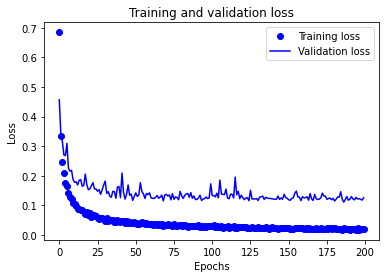

In [60]:
import matplotlib.pyplot as plt 
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(200)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

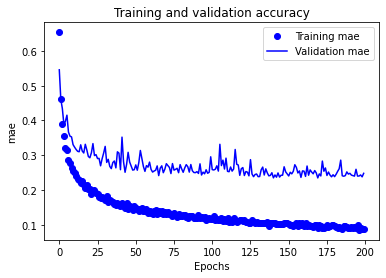

In [61]:
import matplotlib.pyplot as plt 
acc_values = history_dict['mae']
val_acc_values = history_dict['val_mae']
plt.plot(epochs, acc_values, 'bo', label='Training mae')
plt.plot(epochs, val_acc_values, 'b', label='Validation mae')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.legend()
plt.show()

In [62]:
y_pred = network.predict(X_test)

In [63]:
def denorm(x):
    return (x * Y_std) + Y_mean
    

In [64]:
y_pred = denorm(y_pred)

In [65]:
y_true = denorm(Y_test)

In [66]:
y_pred = y_pred.flatten()

In [67]:
y_pred.shape

(309,)

In [68]:
y_true.shape

(309,)

(0.0, 100.0)

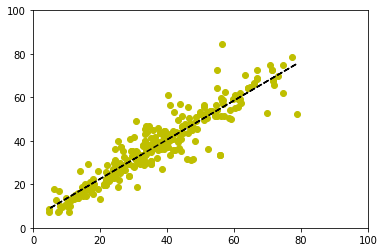

In [69]:
import numpy as np
import matplotlib.pyplot as plt
coef = np.polyfit(y_true,y_pred,1)
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is now a function which takes in x and returns an estimate for y
plt.plot(y_true,y_pred, 'yo', y_true, poly1d_fn(y_true), '--k')
plt.xlim(0, 100)
plt.ylim(0, 100)